In [1]:
#importing required modules
import requests   
#importing BeautifulSoup for extracting data from web i.e web scraping
from bs4 import BeautifulSoup as bs
#importing regular expressions
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# creating empty reviews list
product_reviews=[]

for i in range(1,21):
  oneplus=[]  
#defining url as product webpage 
  url="https://www.amazon.in/OnePlus-Silver-Storage-hands-free-capable/product-reviews/B09MQBRCSZ/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)  
  response = requests.get(url)
#using html parser reading html page
  soup = bs(response.content,"html.parser")
    #finding all the reviews and storing them in reviews variable
  reviews = soup.find_all("span", attrs={"class","a-size-base review-text review-text-content"})
  for i in range(len(reviews)):
    oneplus.append(reviews[i].text)  #appending each review into oneplus list
 #adding all reviews to product_reviewa
  product_reviews = product_reviews + oneplus  

In [3]:
# storing all the reviews in a txt file
with open("oneplus.txt", "w", encoding='utf8') as output:
    output.write(str(product_reviews))

#joining the reviews
rev = " ".join(product_reviews)


In [4]:
#imporing nltk module
import nltk

#converting all the reviews to lower case
rev = re.sub("[^A-Za-z" "]+", " ", rev).lower()
# ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

# all the words in the reviews
words = rev.split(" ")

words = words[1:]

In [5]:
#importing required modules
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( use_idf=True, ngram_range=(1, 1))
X = vectorizer.fit_transform(words)

with open("stop.txt", "r") as w:
    stopwords = w.read()
    
stopwords = stopwords.split("\n")

stopwords.extend(["oneplus","mobile","time","android","phone","device","product","day"])

words = [w for w in words if not w in stopwords]

# Joining words
rev = " ".join(words)

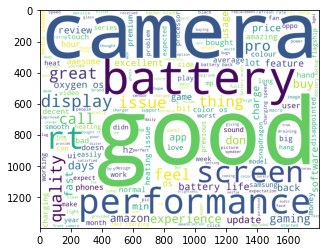

In [6]:
# wordcloud
words_wordcloud = WordCloud(background_color='White',
                      width=1800,
                      height=1400
                     ).generate(rev)
plt.imshow(words_wordcloud)

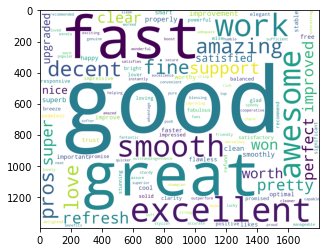

In [7]:
# storing all the positive words in a variable called positive
with open("pos.txt","r") as pw:
  positive = pw.read().split("\n")

positive_positive = " ".join ([w for w in words if w in positive])

positive_wordcloud = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(positive_positive)
plt.figure(2)
plt.imshow(positive_wordcloud)

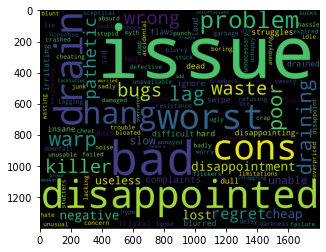

In [8]:
# extracting negative worsd and storing them in negative variable
with open("neg.txt", "r") as neg:
  negative = neg.read().split("\n")

# negative word cloud
negative_negative = " ".join ([w for w in words if w in negative])

negative_wordcloud = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(negative_negative)
plt.figure(3)
plt.imshow(negative_wordcloud)

In [9]:
# performing word_cloud on bigram 
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS

lem = nltk.WordNetLemmatizer()

# converting to lower case
text = rev.lower()

# replacing "'" with """
text = text.replace("'", "")

tokens = nltk.word_tokenize(text)
txt = nltk.Text(tokens)

# elimating unnecessary symbols
content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in txt]

# set of stopwords are created
wc = set(STOPWORDS)
#removing words which doesn't contribute any meaning
removing_words = ['price', 'great'] 
new_sw = wc.union(removing_words)

# eliminating stop words
content = [word for word in content if word not in new_sw]

# non empty entries are taken into content
content = [s for s in content if len(s) != 0]

# performing lemmatization
content = [lem.lemmatize(t) for t in content]
 
list_bigrams = list(nltk.bigrams(content))
print(list_bigrams)

dic = [' '.join(tup) for tup in list_bigrams]
print(dic)

# to view occurance of bigrams CountVectorizer is used
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
bagofwords = vectorizer.fit_transform(dic)
vectorizer.vocabulary_

sumofwords = bagofwords.sum(axis=0)
freqofwords = [(word, sumofwords[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
freqofwords = sorted(freqofwords, key = lambda x: x[1], reverse=True)
print(freqofwords[:100])


[nltk_data] Downloading package punkt to C:\Users\Vamshi
[nltk_data]     Krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('pro', 'flagship'), ('flagship', 'added'), ('added', 'advantage'), ('advantage', 'ois'), ('ois', 'camera'), ('camera', 'con'), ('con', 'heat'), ('heat', 'play'), ('play', 'bgmi'), ('bgmi', 'high'), ('high', 'end'), ('end', 'game'), ('game', 'cool'), ('cool', 'rapidly'), ('rapidly', 'battery'), ('battery', 'drain'), ('drain', 'bit'), ('bit', 'fast'), ('fast', 'hope'), ('hope', 'fix'), ('fix', 'excellent'), ('excellent', 'happy'), ('happy', 'aspect'), ('aspect', 'feel'), ('feel', 'medium'), ('medium', 'range'), ('range', 'camera'), ('camera', 'shock'), ('shock', 'medium'), ('medium', 'budget'), ('budget', 'display'), ('display', 'good'), ('good', 'okbattery'), ('okbattery', 'normal'), ('normal', 'carry'), ('carry', 'charger'), ('charger', 'hrsui'), ('hrsui', 'ui'), ('ui', 'greater'), ('greater', 'money'), ('money', 'collaboration'), ('collaboration', 'oppo'), ('oppo', 'colour'), ('colour', 'o'), ('o', 'completely'), ('completely', 'loose'), ('loose', 'capability'), ('capability', 'lot'

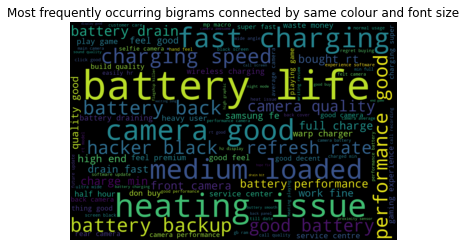

In [10]:
# Generating wordcloud
words_dict = dict(freqofwords)
WC_height = 1000
WC_width = 1500
WC_max_words = 100
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=new_sw)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()